In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sns
import skbio
from qiime2 import Artifact

In [2]:
metadata = pd.read_csv('../input_data/metadata.txt', sep='\t', index_col=0)
metadata

,Location,Type
Sample Id,,
ENVGutDigesta1,Digesta,ENV
ENVGutDigesta2,Digesta,ENV
ENVGutDigesta3,Digesta,ENV
ENVGutTissue1,Tissue,ENV
ENVGutTissue2,Tissue,ENV
ENVGutTissue3,Tissue,ENV
LabGutDigesta1,Digesta,LAB
LabGutDigesta2,Digesta,LAB
LabGutDigesta3,Digesta,LAB


In [3]:
pcoa_results = Artifact.load('../input_data/pcoa/weighted_unifrac_pcoa_results.qza')
pcoa_results = pcoa_results.view(skbio.OrdinationResults)
pcoa_pc = pcoa_results.samples.iloc[:,:3]
pcoa_pc.columns = ['PC1', 'PC2', 'PC3']
pcoa_pc = pd.concat([pcoa_pc,metadata], axis=1)
pcoa_pc['Sample type'] = pcoa_pc['Type'] + '-' + pcoa_pc['Location']
pcoa_pc

,PC1,PC2,PC3,Location,Type,Sample type
Sample Id,,,,,,
ENVGutDigesta1,-0.287401,-0.110163,-0.009940,Digesta,ENV,ENV-Digesta
ENVGutDigesta2,-0.218050,-0.093417,-0.043890,Digesta,ENV,ENV-Digesta
ENVGutDigesta3,-0.282594,-0.130415,0.043195,Digesta,ENV,ENV-Digesta
ENVGutTissue1,0.189143,-0.043715,-0.004797,Tissue,ENV,ENV-Tissue
ENVGutTissue2,0.181516,-0.031979,-0.000415,Tissue,ENV,ENV-Tissue
ENVGutTissue3,0.180938,-0.033686,0.000378,Tissue,ENV,ENV-Tissue
LabGutDigesta1,-0.091021,0.166657,0.052969,Digesta,LAB,LAB-Digesta
LabGutDigesta2,-0.104014,0.164480,-0.000761,Digesta,LAB,LAB-Digesta
LabGutDigesta3,-0.106607,0.197816,-0.042072,Digesta,LAB,LAB-Digesta


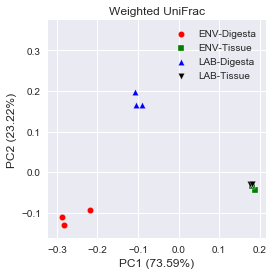

In [4]:
plt.style.use('seaborn')

type2color = dict(zip(pcoa_pc['Sample type'].unique(),'rgbk'))
type2shape = dict(zip(pcoa_pc['Sample type'].unique(),'os^v'))

fig, ax = plt.subplots(figsize=(5.6,4))

for t in pcoa_pc['Sample type'].unique():
    filt = pcoa_pc['Sample type']==t
    x = pcoa_pc.loc[filt,'PC1']
    y = pcoa_pc.loc[filt,'PC2']
    ax.scatter(x=x,
               y=y,
               edgecolors='w',
               s=40,
               c=type2color[t],
               marker=type2shape[t],
               label=t)

plt.title('Weighted UniFrac', fontsize=12)
plt.xlabel('PC1 ({:0.2f}%)'.format(pcoa_results.proportion_explained[0]*100), fontsize=12)
plt.ylabel('PC2 ({:0.2f}%)'.format(pcoa_results.proportion_explained[1]*100), fontsize=12)
plt.legend()
plt.axis('square')

plt.savefig('../figures/w-unifrac.png', dpi=600)
plt.show()